In [1]:
#Cancer survival analysis

In [2]:
# Python code to create the above Kaplan Meier curve
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('haberman.csv')

In [4]:
df.columns=['Age','Operation Year','Number of Axillary node','Survival Status']

In [5]:
df.shape

(305, 4)

In [6]:
df.columns

Index(['Age', 'Operation Year', 'Number of Axillary node', 'Survival Status'], dtype='object')

In [7]:
df.head(4)

,Age,Operation Year,Number of Axillary node,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1945ada0>,
      dtype=object)

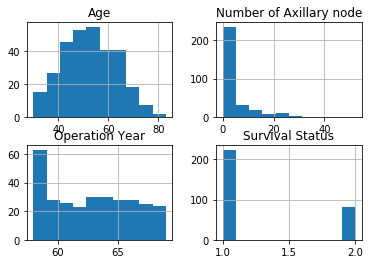

In [8]:
#plt.hist(df['Age'])
df.hist()

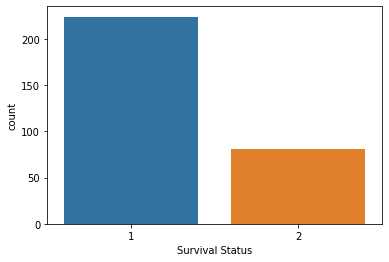

In [9]:
sns.countplot(df['Survival Status'])

In [10]:
df['Survival Status'].nunique()

2

In [11]:
df.shape

(305, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                        305 non-null int64
Operation Year             305 non-null int64
Number of Axillary node    305 non-null int64
Survival Status            305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [13]:
df.describe()

,Age,Operation Year,Number of Axillary node,Survival Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


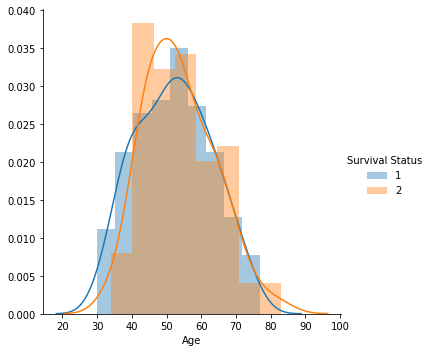

In [14]:
sns.FacetGrid(df,hue='Survival Status',height = 5)\
 .map(sns.distplot,'Age')\
 . add_legend();
plt.show()

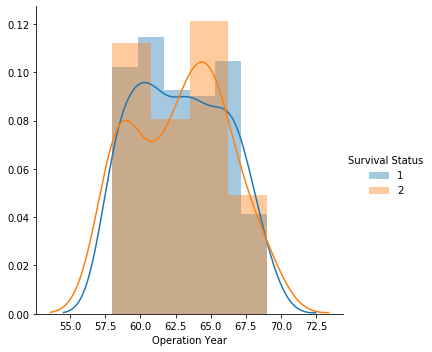

In [15]:
sns.FacetGrid(df,hue='Survival Status',height = 5)\
 .map(sns.distplot,'Operation Year')\
 . add_legend();
plt.show()

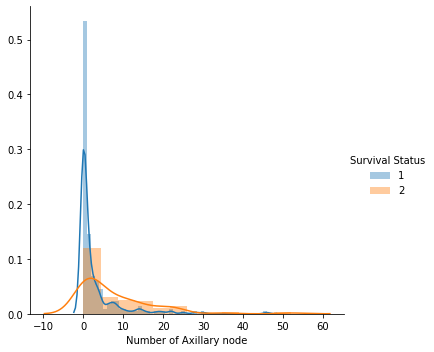

In [16]:
sns.FacetGrid(df,hue='Survival Status',height = 5)\
 .map(sns.distplot,'Number of Axillary node')\
 . add_legend();
plt.show()

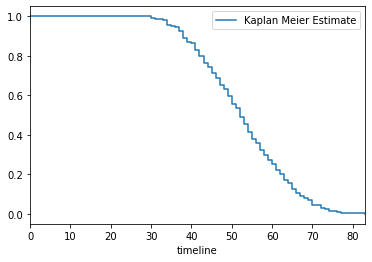

In [17]:
T = df['Age']
E = df['Survival Status']

## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

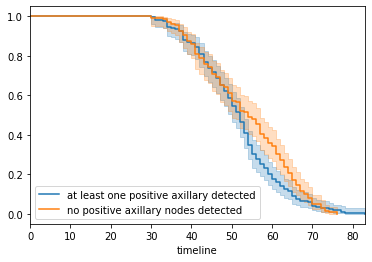

In [18]:
## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = df['Number of Axillary node']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='at least one positive axillary detected')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1)

In [19]:
## Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df, 'Age', event_col='Survival Status')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 305 observations, 0 censored>
      duration col = 'Age'
         event col = 'Survival Status'
number of subjects = 305
  number of events = 305
    log-likelihood = -1441.15
  time fit was run = 2019-08-17 04:38:25 UTC

---
                         coef exp(coef)  se(coef)     z    p  -log2(p)  lower 0.95  upper 0.95
Operation Year          -0.02      0.98      0.02 -1.41 0.16      2.67       -0.06        0.01
Number of Axillary node  0.01      1.01      0.01  1.73 0.08      3.57       -0.00        0.03
---
Concordance = 0.53
Log-likelihood ratio test = 4.65 on 2 df, -log2(p)=3.36


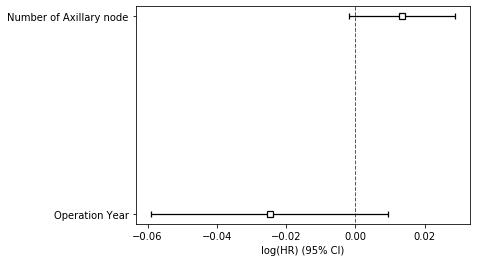

In [20]:
cph.plot()

In [21]:
## I want to see the Survival curve at the patient level.
## Random patients
patients = [4,125,211]
rows_selected = df.iloc[patients, 1:3]
rows_selected

,Operation Year,Number of Axillary node
4,58,10
125,59,0
211,58,0


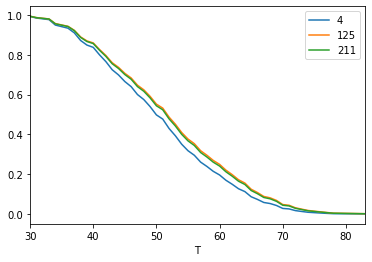

In [22]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()

In [23]:
#CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


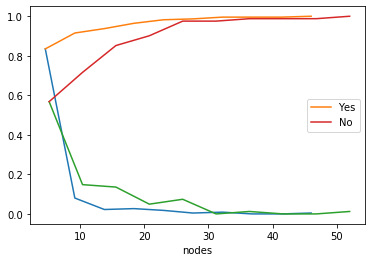

In [24]:
status_yes = df[df['Survival Status']==1]

status_no = df[df['Survival Status']==2]


counts1, bin_edges1 = np.histogram(status_yes['Number of Axillary node'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(status_no['Number of Axillary node'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

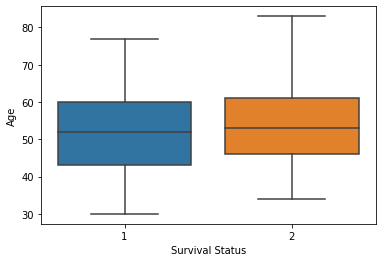

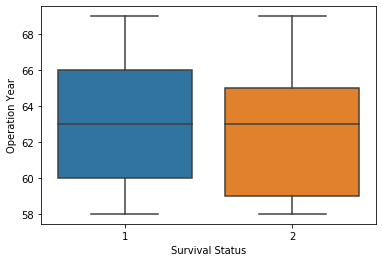

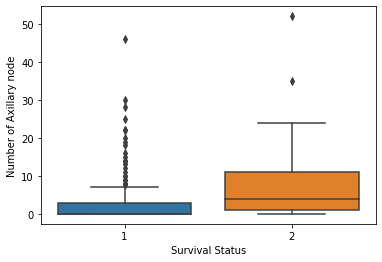

In [25]:
sns.boxplot(x='Survival Status',y='Age',data=df)
plt.show()
sns.boxplot(x='Survival Status',y='Operation Year',data=df)
plt.show()
sns.boxplot(x='Survival Status',y='Number of Axillary node',data=df)
plt.show()

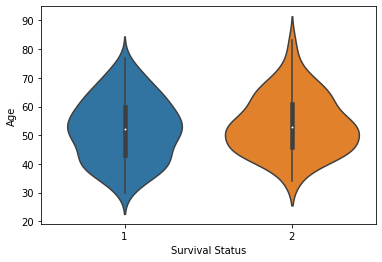

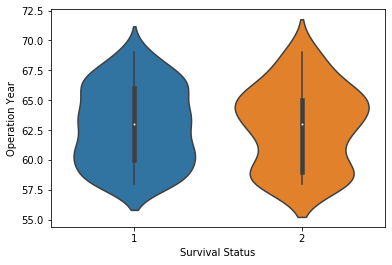

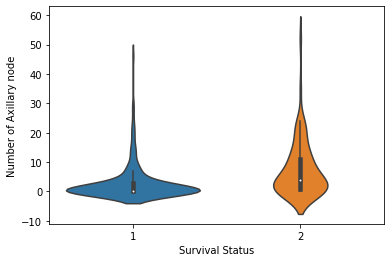

In [26]:
sns.violinplot(x='Survival Status',y='Age',data=df,height = 10)
plt.show()
sns.violinplot(x='Survival Status',y='Operation Year',data=df,height = 10)
plt.show()
sns.violinplot(x='Survival Status',y='Number of Axillary node',data=df,height = 10)
plt.show()

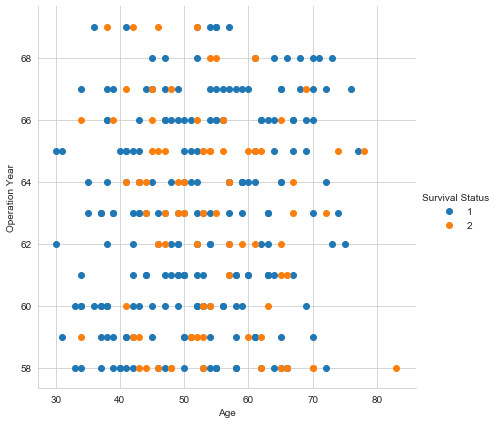

In [27]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "Survival Status" , height = 6)\
 .map(plt.scatter,"Age","Operation Year")\
 .add_legend()
plt.show()

In [28]:
df.columns

Index(['Age', 'Operation Year', 'Number of Axillary node', 'Survival Status'], dtype='object')

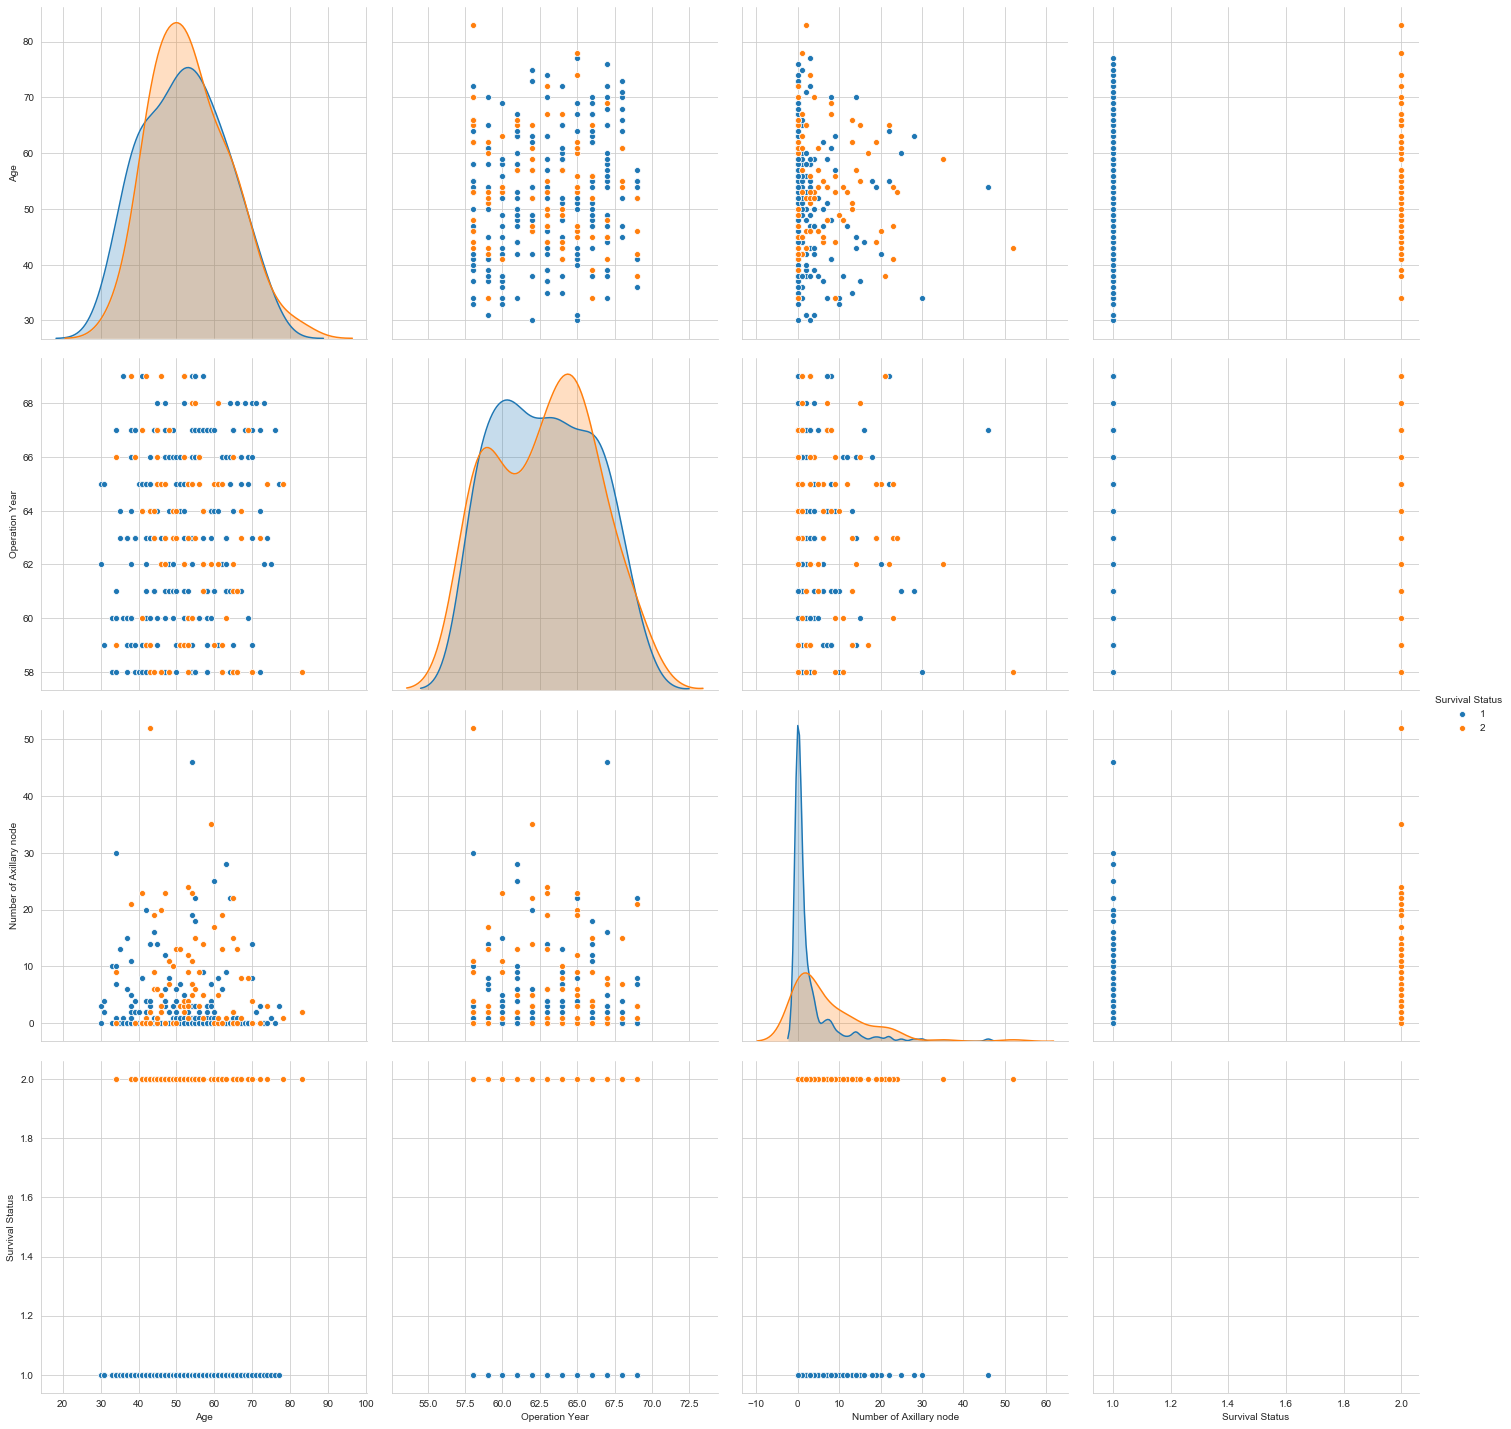

In [29]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Survival Status", height = 5)
plt.show()

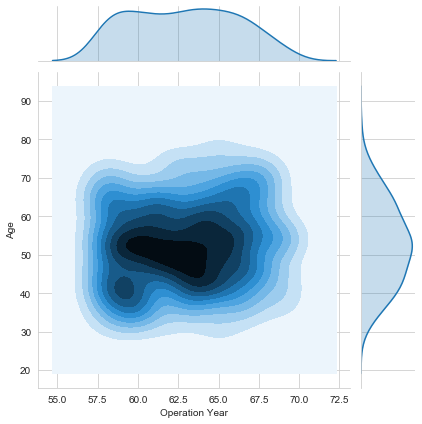

In [30]:
sns.jointplot(x = 'Operation Year', y = 'Age', data = df, kind = "kde")
plt.show()

In [31]:
df.columns

Index(['Age', 'Operation Year', 'Number of Axillary node', 'Survival Status'], dtype='object')

1.Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.

2.Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.

3.The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.


In [32]:
df.shape

(305, 4)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

In [34]:
# Train / Test data split
array = df.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.30
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

In [35]:
# Test options and evaluation metric

num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

In [36]:
# Spot Check Algorithms

algorithms = []
algorithms.append(('LR', LogisticRegression(solver='lbfgs')))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('CART', DecisionTreeClassifier()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('SVM', SVC(gamma='scale')))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('RFC', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, algorithm in algorithms:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.722727 (0.112062)
LDA: 0.727727 (0.113162)
KNN: 0.717727 (0.130557)
CART: 0.618636 (0.118023)
NB: 0.745909 (0.128805)
SVM: 0.695000 (0.096144)
NN: 0.669545 (0.171822)
RFC: 0.676364 (0.117072)


In [37]:
# Make predictions on validation dataset
knn =  GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.782608695652174
[[69  3]
 [17  3]]
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        72
           2       0.50      0.15      0.23        20

    accuracy                           0.78        92
   macro avg       0.65      0.55      0.55        92
weighted avg       0.74      0.78      0.73        92



In [38]:
df.columns

Index(['Age', 'Operation Year', 'Number of Axillary node', 'Survival Status'], dtype='object')

In [39]:
# Applying the trained model to unseen data

df_data = {'Age': [30,34, 35,38,40,50,43,45,34,34,46,50,45,38,42],
           'Operation Year': [65,64,63,64,66,64,64,64,63,63,64,67,64,65,67],
           'Number of Axillary node': [4,10,15,8,40,25,23,40,3,40,3,1,4,2,4]}
new_df = pd.DataFrame(df_data)
new_df

,Age,Operation Year,Number of Axillary node
0,30,65,4
1,34,64,10
2,35,63,15
3,38,64,8
4,40,66,40
5,50,64,25
6,43,64,23
7,45,64,40
8,34,63,3
9,34,63,40


In [40]:
prediction = knn.predict(new_df)

In [41]:
print("Prediction of data survival status: {}".format(prediction))


Prediction of data survival status: [1 1 1 1 2 2 2 2 1 2 1 1 1 1 1]
